In [9]:
from sage.matroids.advanced import *


In [5]:
M = MatrixSpace(QQ,2,3)

In [6]:
A = M([1,2,3, 4,5,6]); A

[1 2 3]
[4 5 6]

In [7]:
R, t = QQ['t'].objgen()

In [8]:
M3 = MatrixSpace(R, 7, 7)
A = M3([-1,1,1,(t-1),t,t*(t-1),t^2*(t-1), 0, -1,0,1, t, t,t,0,0,-1,1,t,t,t,0,0,0,-1,1,1, t-1, 0,0,0,0,-1,0,1,0,0,0,0,0,-1,1,0,0,0,0,0,0,-1]);A
A.inverse()
f = -t^3 - t^2 - 8*t - 1
f.factor()
t = PolynomialRing(ComplexField(), 't').gen()
f = -t^3 - t^2 - 8*t - 1
f.factor()

(-1.00000000000000) * (t + 0.126753752867241) * (t + 0.436623123566379 - 2.77464826761264*I) * (t + 0.436623123566379 + 2.77464826761264*I)

In [10]:
from sage.combinat.posets.posets import FinitePoset


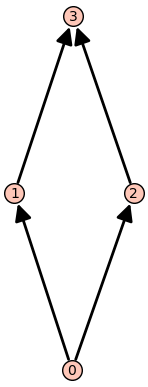

t + 1


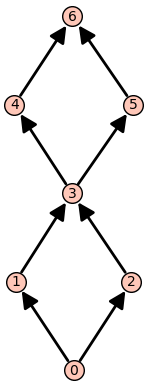

(t + 1) * (t^2 + 3*t + 1)
(t + 1) * (t^2 + 3*t + 1)^2
(t + 1) * (t^2 + 3*t + 1)^3
(t + 1) * (t^2 + 3*t + 1)^4
(t + 1) * (t^2 + 3*t + 1)^5
(t + 1) * (t^2 + 3*t + 1)^6
(t + 1) * (t^2 + 3*t + 1)^7


In [10]:
from sage.all import *
def uc(i):
    uc = [[1,2],[3],[3], []]
    for j in range (1,i):
        uc[-1].append(3*j+1)
        uc[-1].append(3*j+2)
        uc.append([3*j+3])
        uc.append([3*j+3])
        uc.append([])
        
    return uc
    
def P(i):
    return FinitePoset(DiGraph(dict([[j,uc(i)[j]] for j in range(0,len(uc(i)))])), facade=False)

def char(i):
    R, t = QQ['t'].objgen()
    L = []
    Po = P(i)
    if i == 1 or i ==2: 
        Po.show()
    #computes the characteristic polynomials
    for k in range(0, len(uc(i))):
        for j in range (0,len(uc(i))):
            func = 0
            if Po(j)== Po(k): 
                    func =1
                    L.append(func)
                    continue
            else:
                    for w in range(0, len(uc(i))):
                       
                        if type((Po(k))) == int:
                            print("yes")
                        if Po.is_gequal(Po(k), Po(w)) and Po.is_gequal(Po(w), Po(j)):
                            func = func+ t^(Po.rank(k) - Po.rank(w))*Po.moebius_function(Po(j), Po(w))
                    L.append(func)

    M4 = MatrixSpace(R, len(uc(i)), len(uc(i)))
    A = M4(L); A
    A_bar= []
    for h, el in enumerate(L):
        if el ==1:
            A_bar.append(-1)
        else:
            A_bar.append(el/(t-1))
    A_bar = M4(A_bar)
    #return A.transpose(), A_bar.transpose(), -A_bar.transpose().inverse()
    return -A_bar.transpose().inverse()[0][len(uc(i))-1].factor()
for i in range(1, 9):
    print(char(i))    

In [11]:
def add_max(array):
    k = len(array)
    for l in array: 
        if len(l) == 0 :
            l.append(k)
    array.append([])
    return array

In [6]:
def upside_down(liste):
    ud_liste= []
    for j in range(0, len(liste)):
        new_cover = []
        for i in range(0, len(liste)): 
            if j in liste[i]:
                new_cover.append(i)
        ud_liste.append(new_cover)
    return ud_liste


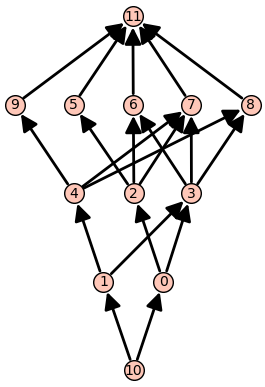

In [65]:
#examples for upside down
bo_poset= [[3,4], [3,4], [], []]
example1 = [[1,2], [3], [3], []]
example1_rev = upside_down(example1)
example2 = [[1,2], [3,4], [3,4], [5,6], [5,6], [], []]
P(example3).show()
example2_rev = upside_down(example2)
example3 = [[2,3], [3,4], [5,6,7], [6,7,8], [7,8,9], [11], [11], [11], [11], [11], [0,1], []]
example3_rev = upside_down(example3)
ex4 = [[1,2], [3,4], [3,4,5], [6,7], [6,7,8], [7,8], [9], [9], [9], []]
ex4_rev = upside_down(ex4)
ex5 = [[1,2], [3], [4], [5], [5], [6,7], [8], [8],[]]
ex5_rev= upside_down(ex5)
ex6 = [[1,2], [3], [4],[5], [6], [7], [7], [8,9],[10], [10], []]
ex6_rev = upside_down(ex6)
ex7= [[1,2], [3], [4], [5], [5], [6,7], [8], [9], [10], [10], []]
ex7_rev = upside_down(ex7)
test_array = [example1, example2, example3]


In [ ]:

def Moeb(liste):
    L = []
    if type(liste) == list:
        Po = P(liste)
    Po = liste
    top = None
    bottom = None
    
    if not len(Po.maximal_elements()) ==1:
        top = 'top'
    if not len(Po.minimal_elements()) ==1:
        bottom = 'bottom'
        
    Po= Po.with_bounds(labels=(bottom, top))
    min_giv = 0
    max_giv = Po.cardinality()-1
    #computes the characteristic polynomials
    
    for k in range(0, len(liste)):
        for j in range (0,len(liste)):
                L.append(Po.moebius_function(Po(k), Po(j)))

    M4 = MatrixSpace(QQ, len(liste), len(liste))
    print(M4(L))
    return M4(L)[:max_giv, 1:], M4(L)[:max_giv, 1:].inverse()

po_4 = [[1,2,3], [4,5], [5,6], [6,4],[7], [7], [7], []]
po_0 = P([[1], []])
product_po = P(po_4).product(po_0)
A1, A2 = Moeb(product_po)

X = char(po_4)
C =  A1* X* A2
print(C)

ValueError: <class 'int'> is not an element of this poset

In [40]:
#creates specific Poset-array
def uk(i) :
    L = [[1,2],[3],[3], [], [], []]
    for s in range (6, i):
        L.append([s+1])
    L.append([])
    return L

def P(liste):
    return FinitePoset(DiGraph(dict([[j,liste[j]] for j in range(0,len(liste))])), facade=False)


#computes X-chow function

def char(liste):
    R, t = QQ['t'].objgen()
    F = FractionField(R)
    L = []
    Po = P(liste)
    min_giv = 0
    max_giv = Po.cardinality()-1
    #computes the characteristic polynomials
    
    for k in range(0, len(liste)):
        for j in range (0,len(liste)):
            func = 0
            if Po(j)== Po(k): 
                    func =1
                    L.append(func)
                    continue
            else:
                    for w in range(0, len(liste)):
                        if Po.is_gequal(Po(j), Po(w)) and Po.is_gequal(Po(w), Po(k)):
                            func = func+ t^(Po.rank(j) - Po.rank(w))*Po.moebius_function(Po(k), Po(w))
                    L.append(func)

    M4 = MatrixSpace(F, len(liste), len(liste))
    A = M4(L); A
    A_bar= []

    for h, el in enumerate(L):
        if el ==1:
            A_bar.append(-1)
        else:
            A_bar.append(el/(t-1))

    A_bar = M4(A_bar)

    #return A.transpose(), A_bar.transpose(), -A_bar.transpose().inverse()
    

    return A_bar[:Po.cardinality()-1, 1:]
    #return -1* A_bar.inverse()[min_giv][max_giv]


M = char(example1)
print(M)
s = M.characteristic_polynomial()
print(s)
K.<a> = s.root_field()
K


[    1     1 t - 1]
[   -1     0     1]
[    0    -1     1]
x^3 - 2*x^2 + 3*x - t - 1


Univariate Quotient Polynomial Ring in a over Fraction Field of Univariate Polynomial Ring in t over Rational Field with modulus x^3 - 2*x^2 + 3*x - t - 1

In [3]:
#compare array with array where max added
#test_array is array of array representing posets

for i in range(0,len(test_array)):
    P(test_array[i]).show()
    print('Chow function test array ' + str(i) + ' is ' + str(char(test_array[i]).factor()))
    print('Chow function test array with new max ' + str(i) + ' is ' + str(char(add_max(test_array[i])).factor()))

NameError: name 'test_array' is not defined

In [ ]:
#arrays with max 
t1 = add_max(h)
t2 =add_max(w2)
t3 = w3
test_array_2 = [t1, t2, t3]

NameError: name 'add_max' is not defined

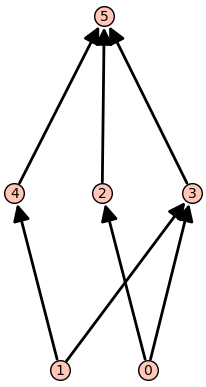

Chow function test array 0 is (t + 1,)


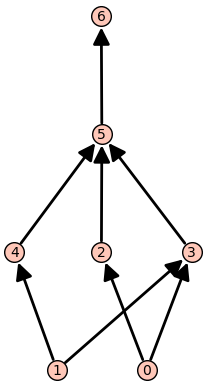

Chow function test array with new max 0 is (t^2 + 2*t + 1,)


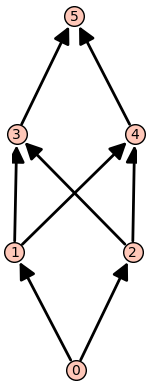

Chow function test array 1 is (t^2 + 3*t + 1,)


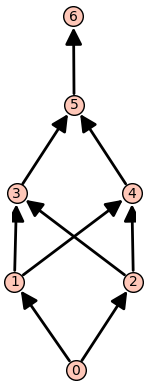

Chow function test array with new max 1 is (t^3 + 4*t^2 + 4*t + 1,)


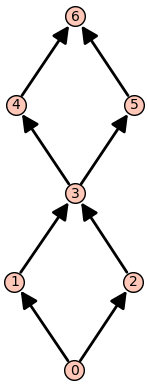

Chow function test array 2 is (t^3 + 4*t^2 + 4*t + 1,)


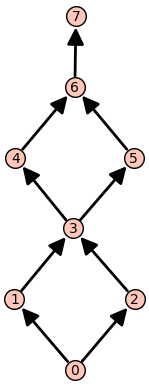

Chow function test array with new max 2 is (t^4 + 5*t^3 + 8*t^2 + 5*t + 1,)


In [ ]:
for i in range(0,len(test_array_2)):
    print('Chow function test array ' + str(i) + ' is ' + str(char(test_array_2[i])))
    print('Chow function test array with new max ' + str(i) + ' is ' + str(char(add_max(test_array_2[i]))))


In [ ]:
S = FractionField(PolynomialRing(IntegerRing(),'x'))

Fraction Field of Univariate Polynomial Ring in x over Integer Ring